# UNIONS/CFIS weak-lensing

ShapePipe and LensFit comparison.
Aperture-mass variance.
With and without $\alpha$ PSF correction.

In [13]:
%matplotlib inline

In [14]:
import numpy as np
from astropy.io import ascii
import matplotlib.pylab as plt

In [59]:
shape = ['LF', 'SP']
alpha = ['orig', 'corr']
color = ['b', 'g']
linestyle = ['-', '-.']

In [52]:
m2 = {}

for sh in shape:
    m2[sh] = {}
    for al in alpha:
        m2[sh][al] = {}
        
        m2_path  = f'{sh}/m2_{al}.txt'
        data = ascii.read(m2_path)
        for key in ['R', 'Mapsq', 'Mxsq', 'sig_map']:
            m2[sh][al][key] = data[key]

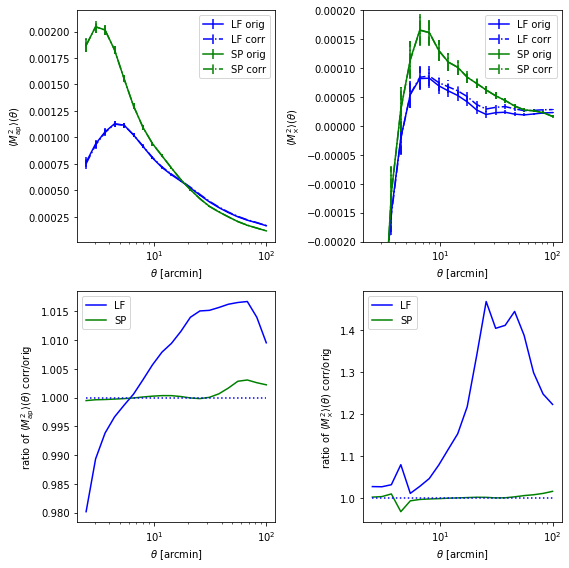

In [80]:
fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(8, 8))

ax = axes[0][0]
for sh, col in zip(shape, color):
    for al, ls in zip(alpha, linestyle):
        my_m2 = m2[sh][al]
        eb = ax.errorbar(
            my_m2['R'],
            my_m2['Mapsq'],
            yerr=my_m2['sig_map'],
            label=f'{sh} {al}',
            color=col,
            linestyle=ls
        )
        eb[-1][0].set_linestyle(ls)
ax.set_xscale('log')
ax.legend()
ax.set_xlabel(r'$\theta$ [arcmin]')
_ = ax.set_ylabel(r'$\langle M_{\rm ap}^2 \rangle(\theta)$')


ax = axes[0][1]
for sh, col in zip(shape, color):
    for al, ls in zip(alpha, linestyle):
        my_m2 = m2[sh][al]
        eb = ax.errorbar(
            my_m2['R'],
            my_m2['Mxsq'],
            yerr=my_m2['sig_map'],
            label=f'{sh} {al}',
            color=col,
            linestyle=ls
        )
        eb[-1][0].set_linestyle(ls)
ax.set_xscale('log')
ym = 0.0002
ax.set_ylim(-ym, ym)
ax.legend()
ax.set_xlabel(r'$\theta$ [arcmin]')
_ = ax.set_ylabel(r'$\langle M_{\times}^2 \rangle (\theta)$')

ax = axes[1][0]
for sh, col in zip(shape, color):
    ax.plot(
        m2[sh]['orig']['R'],
        m2[sh]['corr']['Mapsq'] / m2[sh]['orig']['Mapsq'],
        label=f'{sh}',
        color=col,
    )
ax.plot(m2[sh]['orig']['R'], [1] * len(m2[sh]['orig']['R']), 'b:')
ax.set_xscale('log')
ax.legend()
ax.set_xlabel(r'$\theta$ [arcmin]')
_ = ax.set_ylabel(r'ratio of $\langle M_{\rm ap}^2 \rangle(\theta)$ corr/orig')


ax = axes[1][1]
for sh, col in zip(shape, color):
    ax.plot(
        m2[sh]['orig']['R'],
        m2[sh]['corr']['Mxsq'] / m2[sh]['orig']['Mxsq'],
        label=f'{sh}',
        color=col,
    )
ax.plot(m2[sh]['orig']['R'], [1] * len(m2[sh]['orig']['R']), 'b:')
ax.set_xscale('log')
ax.legend()
ax.set_xlabel(r'$\theta$ [arcmin]')
_ = ax.set_ylabel(r'ratio of $\langle M_{\times}^2 \rangle (\theta)$ corr/orig')

plt.tight_layout()
plt.savefig('MapMx2_SP_LF_corr_orig.png')